# Ejemplo-API-JSON-temperatura-humedad-indice-calor

"El índice de calor, o sensación térmica, proporciona información sobre el nivel de calor que se siente... Es una medida de la temperatura del aire en relación con la humedad relativa para un día en particular..."

Tomado de: https://www.cigna.com/es-us/knowledge-center/hw/ndice-de-calor-sth149651

La siguiente celda de código fue compartida en una clase de un bootcamp C8-IA-intermedio de Talento Tech por el campista Julian Valencia:

API JSON de temperatura/humedad/indice de calor que transmite datos cada 30 min

14-sep-2024


In [90]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

# Paso 1: Realizar la solicitud a la API
url = 'http://idc.ventusarca.com.co/getdata2.php' # URL de la API
respuesta = requests.get(url)
# Verificar si la solicitud fue exitosa
if respuesta.status_code == 200:
  datos_json = respuesta.json() # Convertir la respuesta a JSON
# Paso 2: Convertir el JSON en un DataFrame de pandas
  dfapi = pd.DataFrame(datos_json)
# Paso 3: Visualizar los primeros registros del dataset
  dfapi.head()
# (Opcional) Guardar el dataset como un archivo CSV
  dfapi.to_csv('/content/sample_data/dataset_api_ventusarca.csv', index=False) # Guardar sin el índice
else:
  print(f"Error en la solicitud: {respuesta.status_code}")
  df1 = pd.read_csv('/content/sample_data/dataset_api_ventusarca.csv')
  df1['fecha'] = pd.to_datetime(df1['fecha'])
  df = df1.drop('id', axis=1)
  #df = df.set_index('fecha', inplace=True)

print(datos_json)
print()
print(dfapi)

[{'id': '5335', 'fecha': '2024-10-08 16:48:14', 'temperatura': '20.8', 'humedad': '93', 'heatIndex': '21.36'}, {'id': '5334', 'fecha': '2024-10-08 16:18:13', 'temperatura': '21', 'humedad': '94', 'heatIndex': '21.61'}, {'id': '5333', 'fecha': '2024-10-08 15:48:12', 'temperatura': '21.1', 'humedad': '94', 'heatIndex': '21.72'}, {'id': '5332', 'fecha': '2024-10-08 15:18:12', 'temperatura': '22', 'humedad': '95', 'heatIndex': '22.74'}, {'id': '5331', 'fecha': '2024-10-08 14:48:11', 'temperatura': '22.1', 'humedad': '95', 'heatIndex': '22.85'}, {'id': '5330', 'fecha': '2024-10-08 14:30:16', 'temperatura': '22.8', 'humedad': '95', 'heatIndex': '23.62'}, {'id': '5329', 'fecha': '2024-10-08 14:00:15', 'temperatura': '23', 'humedad': '92', 'heatIndex': '23.76'}, {'id': '5328', 'fecha': '2024-10-08 13:30:14', 'temperatura': '23.2', 'humedad': '94', 'heatIndex': '24.03'}, {'id': '5327', 'fecha': '2024-10-08 13:00:13', 'temperatura': '23.5', 'humedad': '95', 'heatIndex': '24.39'}, {'id': '5326', 

# Desde aquí empieza la propuesta hecha por el ejecutor técnico de Talento Tech en bootcamps de IA, Andrés Felipe Escallón Portilla:

In [91]:
# Visualizando (mejor que usando print) los datos en formato json (estilo diccionario de Python)
datos_json

[{'id': '5335',
  'fecha': '2024-10-08 16:48:14',
  'temperatura': '20.8',
  'humedad': '93',
  'heatIndex': '21.36'},
 {'id': '5334',
  'fecha': '2024-10-08 16:18:13',
  'temperatura': '21',
  'humedad': '94',
  'heatIndex': '21.61'},
 {'id': '5333',
  'fecha': '2024-10-08 15:48:12',
  'temperatura': '21.1',
  'humedad': '94',
  'heatIndex': '21.72'},
 {'id': '5332',
  'fecha': '2024-10-08 15:18:12',
  'temperatura': '22',
  'humedad': '95',
  'heatIndex': '22.74'},
 {'id': '5331',
  'fecha': '2024-10-08 14:48:11',
  'temperatura': '22.1',
  'humedad': '95',
  'heatIndex': '22.85'},
 {'id': '5330',
  'fecha': '2024-10-08 14:30:16',
  'temperatura': '22.8',
  'humedad': '95',
  'heatIndex': '23.62'},
 {'id': '5329',
  'fecha': '2024-10-08 14:00:15',
  'temperatura': '23',
  'humedad': '92',
  'heatIndex': '23.76'},
 {'id': '5328',
  'fecha': '2024-10-08 13:30:14',
  'temperatura': '23.2',
  'humedad': '94',
  'heatIndex': '24.03'},
 {'id': '5327',
  'fecha': '2024-10-08 13:00:13',
  't

In [92]:
# Visualizando (mejor que usando print) los datos en formato de dataframe
dfapi

,id,fecha,temperatura,humedad,heatIndex
0,5335,2024-10-08 16:48:14,20.8,93,21.36
1,5334,2024-10-08 16:18:13,21,94,21.61
2,5333,2024-10-08 15:48:12,21.1,94,21.72
3,5332,2024-10-08 15:18:12,22,95,22.74
4,5331,2024-10-08 14:48:11,22.1,95,22.85
...,...,...,...,...,...
5330,5,2024-06-13 20:38:03,24.4,73,24.8
5331,4,2024-06-13 20:08:02,24.2,75,24.63
5332,3,2024-06-13 19:38:01,23.4,78,23.83
5333,2,2024-06-13 19:08:01,23.9,76,24.33


# Actividad:

1. Hacer un EDA al dataframe anterior
2. Explorar los tres íconos de Google Colab cuando se muestra el dataframe y mostrar los resultados

Ver información acerca de las columnas

###**EDA**

In [93]:
dfapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5335 entries, 0 to 5334
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5335 non-null   object
 1   fecha        5335 non-null   object
 2   temperatura  5335 non-null   object
 3   humedad      5335 non-null   object
 4   heatIndex    5335 non-null   object
dtypes: object(5)
memory usage: 208.5+ KB


Convertir el campo de fecha de tipo object a date

In [94]:
dfapi['fecha'] = pd.to_datetime(dfapi['fecha'])
dfapi

,id,fecha,temperatura,humedad,heatIndex
0,5335,2024-10-08 16:48:14,20.8,93,21.36
1,5334,2024-10-08 16:18:13,21,94,21.61
2,5333,2024-10-08 15:48:12,21.1,94,21.72
3,5332,2024-10-08 15:18:12,22,95,22.74
4,5331,2024-10-08 14:48:11,22.1,95,22.85
...,...,...,...,...,...
5330,5,2024-06-13 20:38:03,24.4,73,24.8
5331,4,2024-06-13 20:08:02,24.2,75,24.63
5332,3,2024-06-13 19:38:01,23.4,78,23.83
5333,2,2024-06-13 19:08:01,23.9,76,24.33


In [95]:
dfapi['temperatura'].describe()

,temperatura
count,5335
unique,118
top,21.9
freq,131


In [96]:
dfapi['humedad'].describe()

,humedad
count,5335
unique,62
top,93
freq,244


In [97]:
dfapi['heatIndex'].describe()

,heatIndex
count,5335
unique,875
top,19.6
freq,23


In [98]:
dfapi = dfapi.drop(columns = ['id'])

Convertir datos de tipo object a float para realizar operaciones matematicas y graficación

In [99]:
dfapi['humedad'] = dfapi['humedad'].astype(float)
dfapi['temperatura'] = dfapi['temperatura'].astype(float)
dfapi['heatIndex'] = dfapi['heatIndex'].astype(float)

In [100]:
dfapi

,fecha,temperatura,humedad,heatIndex
0,2024-10-08 16:48:14,20.8,93.0,21.36
1,2024-10-08 16:18:13,21.0,94.0,21.61
2,2024-10-08 15:48:12,21.1,94.0,21.72
3,2024-10-08 15:18:12,22.0,95.0,22.74
4,2024-10-08 14:48:11,22.1,95.0,22.85
...,...,...,...,...
5330,2024-06-13 20:38:03,24.4,73.0,24.80
5331,2024-06-13 20:08:02,24.2,75.0,24.63
5332,2024-06-13 19:38:01,23.4,78.0,23.83
5333,2024-06-13 19:08:01,23.9,76.0,24.33


In [101]:
dfapi.corr()

,fecha,temperatura,humedad,heatIndex
fecha,1.000000,0.247697,-0.197626,0.232993
temperatura,0.247697,1.000000,-0.520235,0.988079
humedad,-0.197626,-0.520235,1.000000,-0.384371
heatIndex,0.232993,0.988079,-0.384371,1.000000


Text(0.5, 1.0, 'Heat Index vs Temperature')

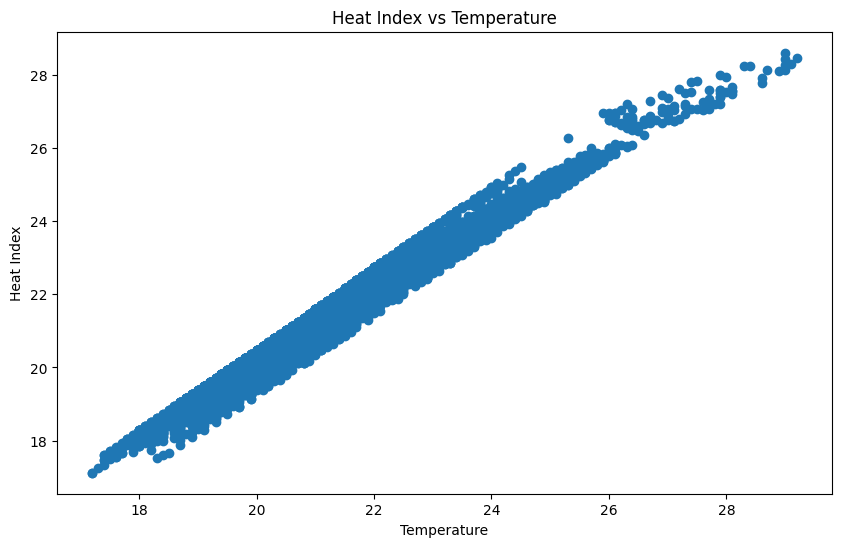

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x = dfapi['temperatura'], y=dfapi['heatIndex'])
plt.xlabel('Temperature')
plt.ylabel('Heat Index')
plt.title('Heat Index vs Temperature')

Text(0.5, 1.0, 'Heat Index vs Humedad')

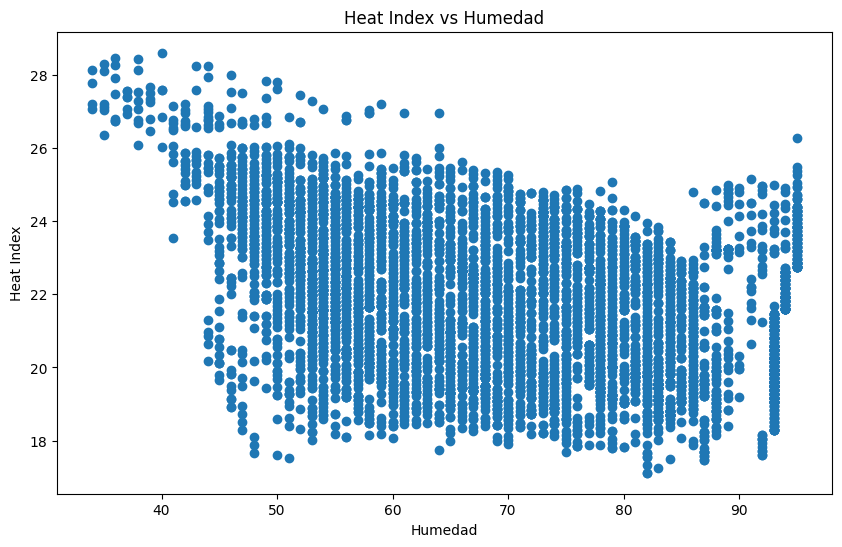

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x = dfapi['humedad'], y=dfapi['heatIndex'])
plt.xlabel('Humedad')
plt.ylabel('Heat Index')
plt.title('Heat Index vs Humedad')

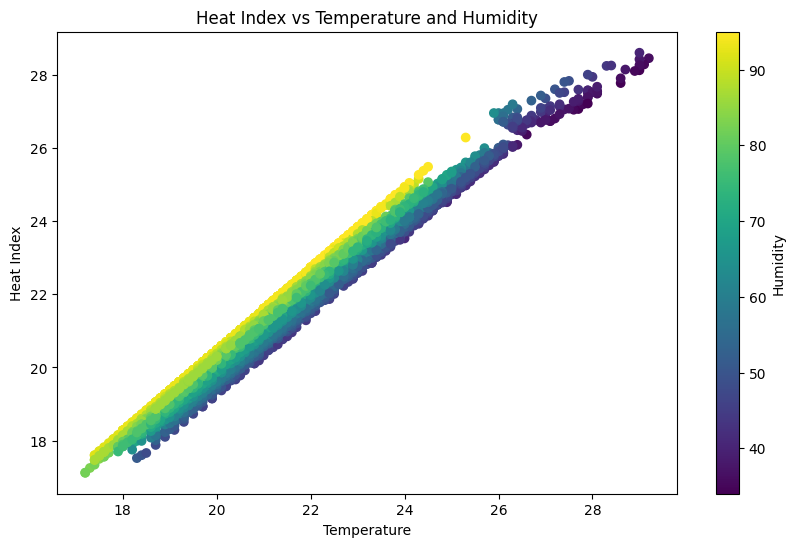

In [104]:
# @title Heat Index vs Temperature and Humidity

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(dfapi['temperatura'], dfapi['heatIndex'], c=dfapi['humedad'], cmap='viridis')
plt.colorbar(label='Humidity')
plt.xlabel('Temperature')
plt.ylabel('Heat Index')
_ = plt.title('Heat Index vs Temperature and Humidity')


# Usando Gemini:

- Prompt:

¿Cómo se calcula el índice de calor (sensación tyérmica) basado en la temperatura y humedad?

- Respuesta (fuera de este ipynb):


## Cómo se Calcula el Índice de Calor (Sensación Térmica)

**El índice de calor** es una medida que combina la temperatura del aire y la humedad relativa para determinar cómo se siente realmente el calor en la piel humana. Es decir, te indica la sensación térmica que experimentamos, ya que la humedad hace que el sudor se evapore más lentamente, aumentando la sensación de calor.

### ¿Cómo se calcula?
El cálculo exacto del índice de calor requiere de fórmulas matemáticas complejas que involucran variables como la temperatura del bulbo seco (temperatura del aire), la temperatura del bulbo húmedo (relacionada con la humedad) y la presión atmosférica.

**Sin embargo, para un uso general**, existen tablas y calculadoras en línea que te permiten obtener una estimación del índice de calor simplemente introduciendo la temperatura y la humedad relativa.

**Ejemplo de una tabla simplificada:**

| Temperatura (°C) | Humedad Relativa (%) | Índice de Calor (°C) | Sensación |
|---|---|---|---|
| 32 | 70 | 38 | Calor incómodo |
| 35 | 80 | 42 | Muy caluroso |
| 40 | 90 | 50 | Extremo calor |

**Importante:** Los valores exactos pueden variar ligeramente según la fuente y los métodos de cálculo utilizados.

### ¿Por qué es importante el índice de calor?
* **Salud:** Ayuda a prevenir enfermedades relacionadas con el calor, como el golpe de calor.
* **Actividades al aire libre:** Permite planificar actividades al aire libre de manera segura, especialmente para personas mayores, niños y personas con enfermedades crónicas.
* **Agricultura:** Influye en el crecimiento de las plantas y en la producción agrícola.
* **Meteorología:** Es un parámetro importante en los pronósticos meteorológicos.

### ¿Dónde encontrar información sobre el índice de calor?
* **Servicios meteorológicos:** La mayoría de los servicios meteorológicos nacionales proporcionan información sobre el índice de calor en sus sitios web y aplicaciones móviles.
* **Aplicaciones móviles:** Existen numerosas aplicaciones meteorológicas que incluyen el índice de calor en sus pronósticos.
* **Noticias locales:** Los medios de comunicación suelen informar sobre el índice de calor durante las olas de calor.

**En resumen,** el índice de calor es una herramienta útil para evaluar las condiciones climáticas y tomar medidas para proteger nuestra salud. Al conocer este valor, podemos tomar decisiones informadas sobre nuestras actividades al aire libre y prevenir problemas de salud relacionados con el calor.

**¿Quieres que te ayude a encontrar una calculadora de índice de calor en línea o te proporcione más información sobre este tema?**

**Palabras clave:** índice de calor, sensación térmica, temperatura, humedad, golpe de calor, meteorología, salud.


- Respuesta (prompt usado dentro de este ipynb después de haber ejecutado todas las celdas):

El índice de calor no se puede calcular directamente usando solo la temperatura y la humedad en el conjunto de datos que proporcionaste.

El conjunto de datos ya incluye una columna llamada ic que representa el índice de calor. Si deseas calcular el índice de calor para otros valores de temperatura y humedad, necesitarías usar una fórmula o un modelo de regresión.

Puedo ayudarte a crear un modelo de regresión para estimar el índice de calor basado en la temperatura y la humedad si lo deseas.

Fuentes
www.wpc.ncep.noaa.gov/html/heatindex.shtml
www.calculator.net/heat-index-calculator.html
www.weather.gov/ama/heatindex
www.wpc.ncep.noaa.gov/html/heatindex_equation.shtml
www.omnicalculator.com/physics/heat-index


# TAREA (intentar terminarla para las siguiente clase):

1. Hacer regresión múltiple, **también regresión polinómica (variando el grado: 1, 2, 3, 4, 5, etc...)  y logarítmica ( variable: logX, consultar)** para estimar el índice de calor (sensación térmica cuantitativa) en función de la temperatura y/o humedad (**con solo la temperatura, con solo la humedad, y con ambas**).

2. Crear una columna que se llame sensación térmica para describirla cualitativamente en 5 categorías (muy baja, baja, media, alta, muy alta).

3. Con lo anterior, investigar cómo se puede estimar la categoría de la sensación térmica usando regresión logística (la cual es usada para clasificación) en dos escenarios: A) Solo teniendo en cuenta la variable índice de calor, y B) teniendo en cuenta tres variables: temperatura, humedad e índice de calor.

4. Graficar las siguientes series temporales:

- Temperatura vs Fecha
- Humedad vs Fecha
- Índice de calor vs Fecha
- Sensación térmica vs Fecha

###**Regresión multiple**

Importacion de librerias

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


In [106]:
X = dfapi[['temperatura', 'humedad']]
Y = dfapi['heatIndex']

In [107]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25, random_state=10)

In [108]:
print(f"Shape of train_x: {train_x.shape}")
print(f"Shape of train_y: {train_y.shape}")

Shape of train_x: (4001, 2)
Shape of train_y: (4001,)


In [109]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(4001, 2) (4001,) (1334, 2) (1334,)


In [110]:
reg = LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

In [111]:
ypred = reg.predict(test_x)

In [112]:
print("R_2 score is:", r2_score(test_y,ypred))
print("MSE is:", mean_squared_error(test_y,ypred))
print("RMSE is:", (mean_squared_error(test_y,ypred))**0.5)

R_2 score is: 0.9993632156617772
MSE is: 0.0028719433266707352
RMSE is: 0.05359051526782267


In [113]:
print("La ecuacion generada es:" ,reg.coef_[0], "x1 +", reg.coef_[1],"x2 +", reg.intercept_ )

La ecuacion generada es: 1.1005362720892742 x1 + 0.026183364307359614 x2 + -3.960200175776013


###Mirar como graficar

###**Regresion polinomica temperatura**

In [114]:
poly_features = np.polyfit(dfapi['temperatura'], dfapi['heatIndex'], 1)
poly_model = np.poly1d(poly_features)
poly_model

poly1d([ 1.0068122 , -0.12150086])

In [115]:
model = LinearRegression()
model.fit(dfapi[['temperatura']], dfapi['heatIndex'])

LinearRegression()

In [116]:
ypredict = model.predict(dfapi[['temperatura']])

Text(0.5, 1.0, 'Heat Index vs Temperature')

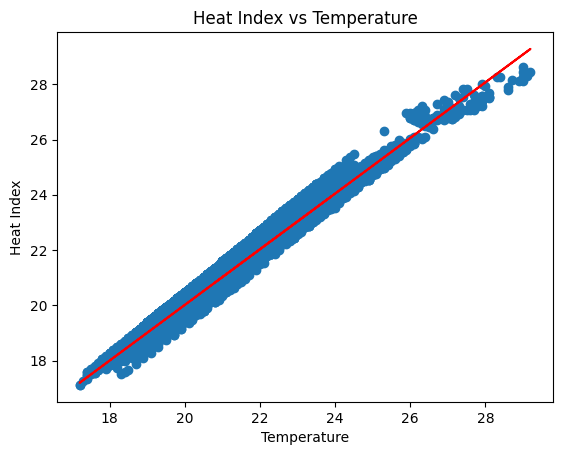

In [117]:
plt.scatter(dfapi['temperatura'], dfapi['heatIndex'])
plt.plot(dfapi['temperatura'], ypredict, c = 'red')
plt.xlabel('Temperature')
plt.ylabel('Heat Index')
plt.title('Heat Index vs Temperature')

In [118]:
print("R_2", r2_score(dfapi['heatIndex'], ypredict))
print("MSE", mean_squared_error(dfapi['heatIndex'], ypredict))
print("RMSE", (mean_squared_error(dfapi['heatIndex'], ypredict))**0.5)

R_2 0.9763007235017288
MSE 0.10462956167227729
RMSE 0.32346493113207386


Text(0.5, 1.0, 'Heat Index vs Temperature')

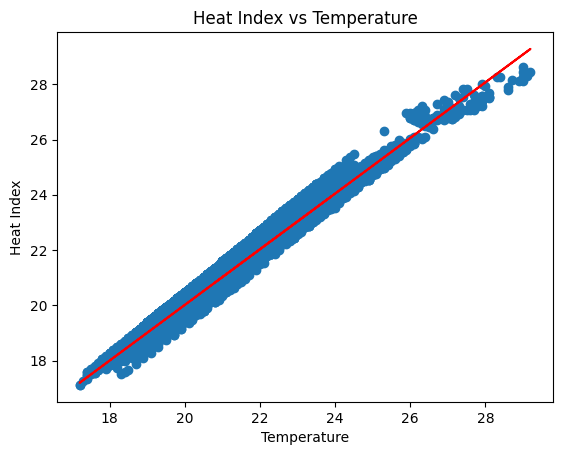

In [119]:
poly_features = np.polyfit(dfapi['temperatura'], dfapi['heatIndex'], 2)
poly_model = np.poly1d(poly_features)
poly_model
model = LinearRegression()
model.fit(dfapi[['temperatura']], dfapi['heatIndex'])
ypredict = model.predict(dfapi[['temperatura']])
plt.scatter(dfapi['temperatura'], dfapi['heatIndex'])
plt.plot(dfapi['temperatura'], ypredict, c = 'red')
plt.xlabel('Temperature')
plt.ylabel('Heat Index')
plt.title('Heat Index vs Temperature')

In [120]:
print("R_2", r2_score(dfapi['heatIndex'], ypredict))
print("MSE", mean_squared_error(dfapi['heatIndex'], ypredict))
print("RMSE", (mean_squared_error(dfapi['heatIndex'], ypredict))**0.5)

R_2 0.9763007235017288
MSE 0.10462956167227729
RMSE 0.32346493113207386


<ipython-input-121-a067dfe5b6e3>:1: RankWarning: Polyfit may be poorly conditioned
  poly_features = np.polyfit(dfapi['temperatura'], dfapi['heatIndex'], 100)


Text(0.5, 1.0, 'Heat Index vs Temperature')

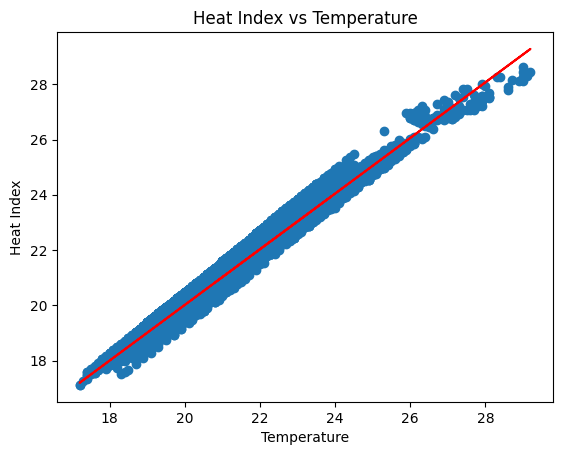

In [121]:
poly_features = np.polyfit(dfapi['temperatura'], dfapi['heatIndex'], 100)
poly_model = np.poly1d(poly_features)
poly_model
model = LinearRegression()
model.fit(dfapi[['temperatura']], dfapi['heatIndex'])
ypredict = model.predict(dfapi[['temperatura']])
plt.scatter(dfapi['temperatura'], dfapi['heatIndex'])
plt.plot(dfapi['temperatura'], ypredict, c = 'red')
plt.xlabel('Temperature')
plt.ylabel('Heat Index')
plt.title('Heat Index vs Temperature')

In [122]:
print("R_2", r2_score(dfapi['heatIndex'], ypredict))
print("MSE", mean_squared_error(dfapi['heatIndex'], ypredict))
print("RMSE", (mean_squared_error(dfapi['heatIndex'], ypredict))**0.5)

R_2 0.9763007235017288
MSE 0.10462956167227729
RMSE 0.32346493113207386


Regresion polinomica para humedad

In [123]:
poly_features = np.polyfit(dfapi['humedad'], dfapi['heatIndex'], 1)
poly_model = np.poly1d(poly_features)
poly_model

poly1d([-0.05660462, 25.74612128])

In [124]:
model = LinearRegression()
model.fit(dfapi[['humedad']], dfapi['heatIndex'])

LinearRegression()

In [125]:
ypredict = model.predict(dfapi[['humedad']])

Text(0.5, 1.0, 'Heat Index vs Humedad')

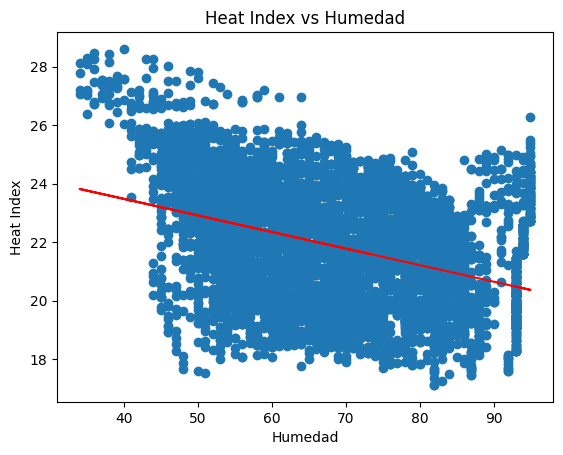

In [126]:
plt.scatter(dfapi['humedad'], dfapi['heatIndex'])
plt.plot(dfapi['humedad'], ypredict, c = 'red')
plt.xlabel('Humedad')
plt.ylabel('Heat Index')
plt.title('Heat Index vs Humedad')

In [127]:
print("R_2", r2_score(dfapi['heatIndex'], ypredict))
print("MSE", mean_squared_error(dfapi['heatIndex'], ypredict))
print("RMSE", (mean_squared_error(dfapi['heatIndex'], ypredict))**0.5)

R_2 0.14774093213379969
MSE 3.7626251041279293
RMSE 1.9397487219039298


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
<ipython-input-128-4f7207d83496>:1: RankWarning: Polyfit may be poorly conditioned
  poly_features = np.polyfit(dfapi['humedad'], dfapi['heatIndex'], 100)


Text(0.5, 1.0, 'Heat Index vs humedad')

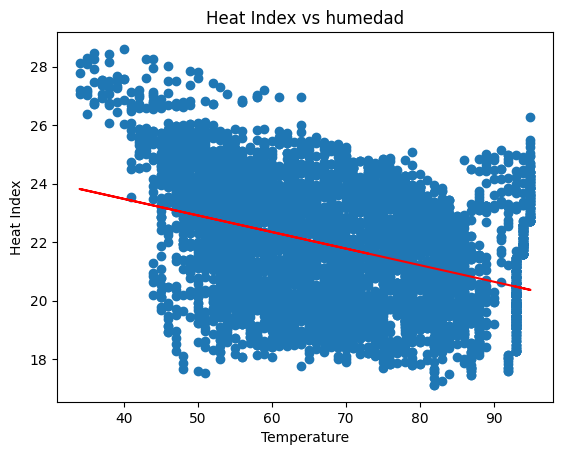

In [128]:
poly_features = np.polyfit(dfapi['humedad'], dfapi['heatIndex'], 100)
poly_model = np.poly1d(poly_features)
poly_model
model = LinearRegression()
model.fit(dfapi[['humedad']], dfapi['heatIndex'])
ypredict = model.predict(dfapi[['humedad']])
plt.scatter(dfapi['humedad'], dfapi['heatIndex'])
plt.plot(dfapi['humedad'], ypredict, c = 'red')
plt.xlabel('Temperature')
plt.ylabel('Heat Index')
plt.title('Heat Index vs humedad')

In [129]:
print("R_2", r2_score(dfapi['heatIndex'], ypredict))
print("MSE", mean_squared_error(dfapi['heatIndex'], ypredict))
print("RMSE", (mean_squared_error(dfapi['heatIndex'], ypredict))**0.5)

R_2 0.14774093213379969
MSE 3.7626251041279293
RMSE 1.9397487219039298


###**REGRESION LOGARITMICA**

In [130]:
poly_features = np.polyfit(np.log(dfapi['temperatura']), dfapi['heatIndex'], 1)
poly_model = np.poly1d(poly_features)
a = poly_model[0]
b = poly_model[1]
poly_model

poly1d([ 22.10049813, -46.18734351])

In [131]:
pred = a + b*np.log(dfapi['temperatura'])

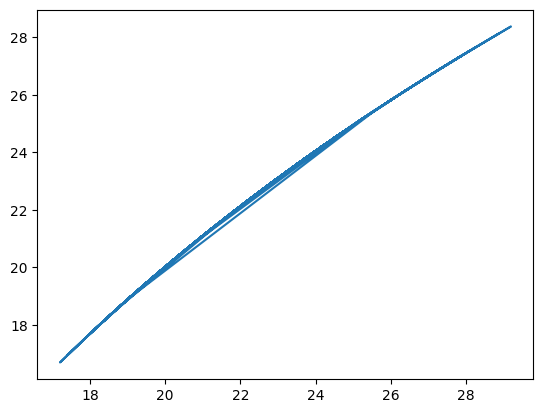

In [132]:
plt.plot(dfapi['temperatura'],pred)

In [133]:
reg = LinearRegression()
reg.fit(dfapi[['temperatura']], dfapi['heatIndex'])

LinearRegression()

In [134]:
ypredict = reg.predict(dfapi[['temperatura']])

In [135]:
print("R_2", r2_score(np.log10(dfapi['heatIndex']), ypredict))
print("MSE", mean_squared_error(dfapi['heatIndex'], ypredict))
print("RMSE", (mean_squared_error(dfapi['heatIndex'], ypredict))**0.5)

R_2 -245656.40932305827
MSE 0.10462956167227729
RMSE 0.32346493113207386


###**Creación columna sensación termica**

In [136]:
heatIndex = dfapi['heatIndex']
heatIndex

,heatIndex
0,21.36
1,21.61
2,21.72
3,22.74
4,22.85
...,...
5330,24.80
5331,24.63
5332,23.83
5333,24.33


In [137]:
def cualitative_heat_index(heatIndex):
  if heatIndex <= -10:
    return 'Muy baja'
  elif -10 < heatIndex <= 0:
    return 'Baja'
  elif 0 < heatIndex <= 22:
    return 'Media'
  elif 22 < heatIndex <= 35:
    return 'Alta'
  elif heatIndex > 35:
    return 'Muy alta'


In [138]:
dfapi['cualitative_heatIndex'] = dfapi['heatIndex'].apply(cualitative_heat_index)
dfapi

,fecha,temperatura,humedad,heatIndex,cualitative_heatIndex
0,2024-10-08 16:48:14,20.8,93.0,21.36,Media
1,2024-10-08 16:18:13,21.0,94.0,21.61,Media
2,2024-10-08 15:48:12,21.1,94.0,21.72,Media
3,2024-10-08 15:18:12,22.0,95.0,22.74,Alta
4,2024-10-08 14:48:11,22.1,95.0,22.85,Alta
...,...,...,...,...,...
5330,2024-06-13 20:38:03,24.4,73.0,24.80,Alta
5331,2024-06-13 20:08:02,24.2,75.0,24.63,Alta
5332,2024-06-13 19:38:01,23.4,78.0,23.83,Alta
5333,2024-06-13 19:08:01,23.9,76.0,24.33,Alta


In [139]:
dfapi['cualitative_heatIndex'].value_counts()

,count
cualitative_heatIndex,
Media,2791
Alta,2544


###**Regresion logistica**

A) Solo teniendo en cuenta la variable índice de calor, y B) teniendo en cuenta tres variables: temperatura, humedad e índice de calor.

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

Turning categorical into numerical variables

In [141]:
categorial = {'Alta': 1, 'Media': 0}

In [142]:
dfapi['cualitative_heatIndex'] = dfapi['cualitative_heatIndex'].map(categorial)
dfapi

,fecha,temperatura,humedad,heatIndex,cualitative_heatIndex
0,2024-10-08 16:48:14,20.8,93.0,21.36,0
1,2024-10-08 16:18:13,21.0,94.0,21.61,0
2,2024-10-08 15:48:12,21.1,94.0,21.72,0
3,2024-10-08 15:18:12,22.0,95.0,22.74,1
4,2024-10-08 14:48:11,22.1,95.0,22.85,1
...,...,...,...,...,...
5330,2024-06-13 20:38:03,24.4,73.0,24.80,1
5331,2024-06-13 20:08:02,24.2,75.0,24.63,1
5332,2024-06-13 19:38:01,23.4,78.0,23.83,1
5333,2024-06-13 19:08:01,23.9,76.0,24.33,1


In [148]:
train_x, test_x, train_y, test_y = train_test_split(dfapi[['heatIndex']], dfapi['cualitative_heatIndex'], test_size=0.25, random_state=10)

In [150]:
reg = LogisticRegression()
reg.fit(train_x, train_y)

LogisticRegression()

In [151]:
ypred = reg.predict(test_x)

In [153]:
print("Accuracy score is", accuracy_score(test_y, ypred))
print("Precision score is", precision_score(test_y, ypred))
print("Recall score is", recall_score(test_y, ypred))
print("F1 score is", f1_score(test_y, ypred))

Accuracy score is 0.9977511244377811
Precision score is 0.9952229299363057
Recall score is 1.0
F1 score is 0.9976057462090981


Text(0, 0.5, 'cualitative_heatIndex')

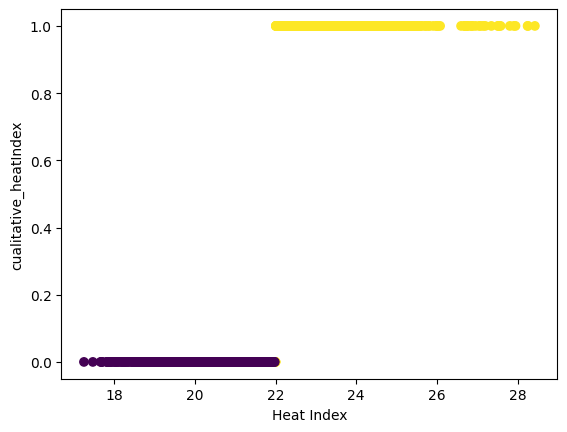

In [154]:
plt.scatter(test_x, test_y, c = ypred)
plt.xlabel('Heat')
plt.ylabel('cualitative_heatIndex')

In [157]:
cm = confusion_matrix(test_y, ypred)
cm

array([[706,   3],
       [  0, 625]])

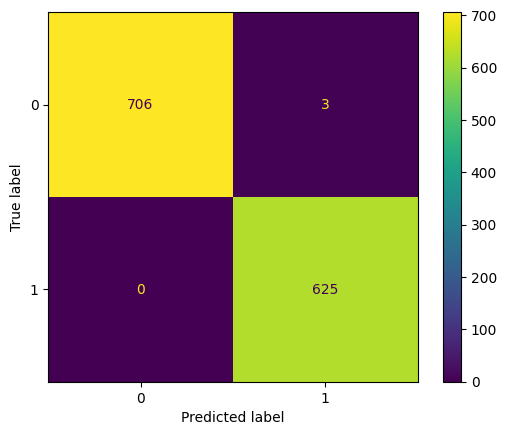

In [160]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=reg.classes_)
disp.plot()
plt.show()

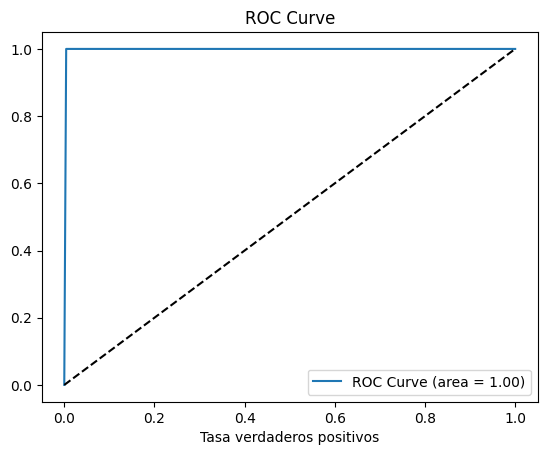

In [162]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
def curva_roc(test_y, ypred):
  fpr, tpr, thresholds = roc_curve(test_y, ypred)
  plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % auc(fpr, tpr))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('Tasa falsos positivos')
  plt.xlabel('Tasa verdaderos positivos')
  plt.title('ROC Curve')
  plt.legend(loc = 'lower right')
  plt.show()

curva_roc(test_y, ypred)

###**Series temporales**

Temperatura vs Fecha


Text(0.5, 1.0, 'Temperatura vs Fecha')

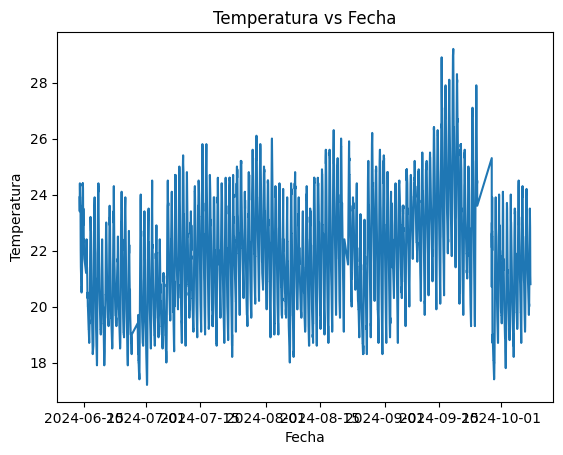

In [143]:
plt.plot(dfapi['fecha'], dfapi['temperatura'])
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.title('Temperatura vs Fecha')

Humedad vs Fecha


Text(0.5, 1.0, 'Humedad vs Fecha')

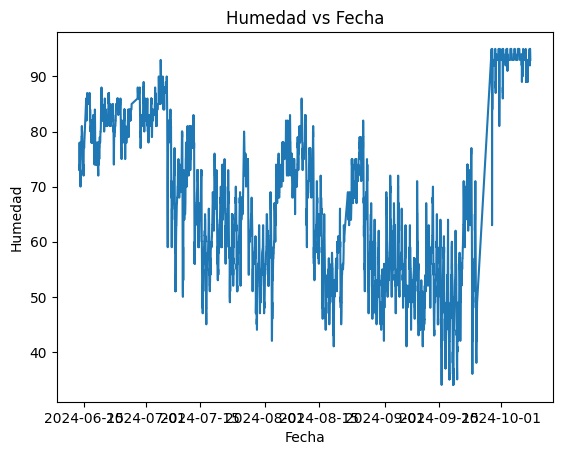

In [144]:
plt.plot(dfapi['fecha'], dfapi['humedad'])
plt.xlabel('Fecha')
plt.ylabel('Humedad')
plt.title('Humedad vs Fecha')

Índice de calor vs Fecha


Text(0.5, 1.0, 'heatIndex vs Fecha')

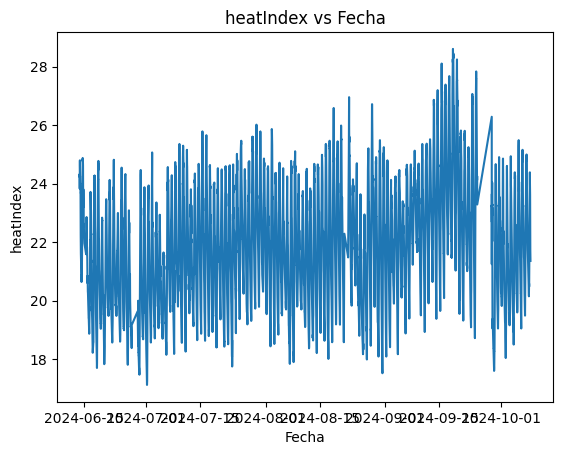

In [145]:
plt.plot(dfapi['fecha'], dfapi['heatIndex'])
plt.xlabel('Fecha')
plt.ylabel('heatIndex')
plt.title('heatIndex vs Fecha')

Sensación térmica vs Fecha

In [147]:
plt.plot(dfapi['fecha'], dfapi['heatIndex'])
plt.xlabel('Fecha')
plt.ylabel('Humedad')
plt.title('Humedad vs Fecha')

KeyError: 'heat_index'